# Exploratory Data Analysis and Visualization #

All the tables are stored in PostgreSQL. As part of this notebook, upload the datasets from PostgreS and merge all the datasets for easy correlation and analysis.

In this notebook we will do EDA and visualizations on the Brazilian e-commerce data having 100K orders from 2016 till 2018.

## Set-up working environment ##

In [1]:
# import the necessary libraries needed for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

# Get the files from the database and do EDA #

In [3]:
from dotenv import load_dotenv
load_dotenv()

# Import get_dataframe_cp function from the sql module
from sql_functions import get_dataframe_cp
import pandas as pd

# Set schema for accessing Postgres
schema = 'e_commerce'

## Get Order Items Dataset ## 

In [4]:
file_name = 'order_items_dataset'
sql = f'select * from {schema}.{file_name}'
order_items_df = get_dataframe_cp(sql)
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87


## Get Orders Delivered Dataset ##

In [5]:
file_name = 'orders_delivered_dataset'
sql = f'select * from {schema}.{file_name}'
orders_delivered_df = get_dataframe_cp(sql)
orders_delivered_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_item_id,...,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days,order_delivered_carrier_date_m,order_delivered_customer_date_m,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,1,...,2017,10,3,5,6,11,642000000000,2017-10-04 19:55:00,2017-10-10 21:25:13,appliances
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,2,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table


## Get Order Payments Ref Dataset ##

In [6]:
file_name = 'order_payments_ref_dataset'
sql = f'select * from {schema}.{file_name}'
order_payments_ref_df = get_dataframe_cp(sql)
order_payments_ref_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


## Get Orders Reviews Dataset ##

In [7]:
file_name = 'orders_reviews_dataset'
sql = f'select * from {schema}.{file_name}'
orders_reviews_df = get_dataframe_cp(sql)
orders_reviews_df.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24


## Get Products dataset ##

In [8]:
file_name = 'products_dataset'
sql = f'select * from {schema}.{file_name}'
products_df = get_dataframe_cp(sql)
products_df.head(3)

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.00,287.00,1.00,225.00,16.00,10.00,14.00,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.00,276.00,1.00,"1,000.00",30.00,18.00,20.00,art
2,96bd76ec8810374ed1b65e291975717f,46.00,250.00,1.00,154.00,18.00,9.00,15.00,sports_leisure


## Get Sellers Dataset ##

In [9]:
file_name = 'sellers_dataset'
sql = f'select * from {schema}.{file_name}'
sellers_df = get_dataframe_cp(sql)
sellers_df.head(3)

,seller_id,seller_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031


## Get Seller Review Dataset ##

In [10]:
file_name = 'seller_review_dataset'
sql = f'select * from {schema}.{file_name}'
seller_review_df = get_dataframe_cp(sql)
seller_review_df.head(3)

,order_id,order_status,order_purchase_timestamp,review_id,review_score,review_creation_date,product_id,seller_id,price,freight_value,order_year,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4.00,2017-10-11,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,8d5266042046a06655c8db133d120ba5,4.00,2018-08-08,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,e73b67b67587f7644d5bd1a52deb1b01,5.00,2018-08-18,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,2018,8


## Get Customers Dataset ##

In [11]:
file_name = 'customers_dataset'
sql = f'select * from {schema}.{file_name}'
customers_df = get_dataframe_cp(sql)
customers_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151


## Get Geolocation Final Dataset ##

In [12]:
file_name = 'geolocation_final_dataset_eng'
sql = f'select * from {schema}.{file_name}'
geolocation_df = get_dataframe_cp(sql)
geolocation_df.head(3)

,geolocation_zip_code_prefix,avg_geolocation_lat,avg_geolocation_lan,geolocation_city,geolocation_state
0,1001,-23.55,-46.63,sao paulo,SP
1,1002,-23.55,-46.64,sao paulo,SP
2,1003,-23.55,-46.64,sao paulo,SP


# Understand the data #

In [13]:
orders_delivered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   order_id                                110197 non-null  object        
 1   customer_id                             110197 non-null  object        
 2   order_status                            110197 non-null  object        
 3   order_purchase_timestamp                110197 non-null  datetime64[ns]
 4   order_approved_at                       110182 non-null  datetime64[ns]
 5   order_delivered_carrier_date            110197 non-null  datetime64[ns]
 6   order_delivered_customer_date           110197 non-null  datetime64[ns]
 7   order_estimated_delivery_date           110197 non-null  datetime64[ns]
 8   order_delivery_customer_day_difference  110189 non-null  float64       
 9   order_item_id                        

In [14]:
df = orders_delivered_df.copy()
display(df.shape)
df.head(3)

(110197, 43)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_item_id,...,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days,order_delivered_carrier_date_m,order_delivered_customer_date_m,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,1,...,2017,10,3,5,6,11,642000000000,2017-10-04 19:55:00,2017-10-10 21:25:13,appliances
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,2,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table


# Explore and Clean your Data #

In [15]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_delivery_customer_day_difference', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix', 'seller_lat',
       'seller_lon', 'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_lat', 'customer_lon',
       'customer_city', 'customer_state', 'distance', 'order_year',
       'order_month', 'actual_processing_days', 'estimated_processing_days',
       'actual_shipping_days', 'estimated_shipping_days', 'approval_days',
       'order_delivered_carrier_date_m', 'order_delivered_customer_date_m',
     

In [16]:
df.isnull().sum()

order_id                                     0
customer_id                                  0
order_status                                 0
order_purchase_timestamp                     0
order_approved_at                           15
order_delivered_carrier_date                 0
order_delivered_customer_date                0
order_estimated_delivery_date                0
order_delivery_customer_day_difference       8
order_item_id                                0
product_id                                   0
seller_id                                    0
shipping_limit_date                          0
price                                        0
freight_value                                0
product_photos_qty                        1537
product_weight_g                            18
product_length_cm                           18
product_height_cm                           18
product_width_cm                            18
product_category_name_english                0
seller_zip_co

In [17]:
ids = orders_delivered_df['customer_unique_id']
ip = orders_delivered_df[ids.isin(ids[ids.duplicated()])].sort_values('customer_unique_id')

ip['customer_unique_id'].nunique()

11610

In [18]:
orders_delivered_df['customer_unique_id'].nunique()

93358

In [19]:
rr = round(((11610/93358)*100), 2)

'retention rate of customers in percentage: %s' %rr

'retention rate of customers in percentage: 12.44'

## Descriptive Statistics ##

In [20]:
df.describe()

,order_delivery_customer_day_difference,order_item_id,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,...,customer_lat,customer_lon,distance,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days
count,"110,189.00","110,197.00","110,197.00","110,197.00","108,660.00","110,179.00","110,179.00","110,179.00","110,179.00","110,197.00",...,"110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00"
mean,12.01,1.20,119.98,19.95,2.21,"2,089.68",30.14,16.56,22.99,"24,467.84",...,-21.23,-46.22,595.73,"2,017.54",6.03,3.79,7.41,8.74,16.77,"-1,217,623,736,869,615.75"
std,9.45,0.71,182.30,15.70,1.72,"3,741.61",16.12,13.41,11.69,"27,624.67",...,5.56,4.03,585.87,0.50,3.23,3.62,3.19,8.59,8.13,"107,603,096,962,198,688.00"
min,0.00,1.00,0.85,0.00,1.00,0.00,7.00,2.00,6.00,"1,001.00",...,-33.69,-72.67,0.00,"2,016.00",1.00,0.00,3.00,0.00,-25.00,"-9,223,372,036,854,775,808.00"
25%,6.00,1.00,39.90,13.08,1.00,300.00,18.00,8.00,15.00,"6,429.00",...,-23.59,-48.12,186.64,"2,017.00",3.00,2.00,6.00,4.00,12.00,"779,000,000,000.00"
50%,10.00,1.00,74.90,16.26,1.00,700.00,25.00,13.00,20.00,"13,568.00",...,-22.93,-46.64,432.89,"2,018.00",6.00,3.00,7.00,7.00,16.00,"1,261,000,000,000.00"
75%,15.00,1.00,134.17,21.15,3.00,"1,800.00",38.00,20.00,30.00,"28,035.00",...,-20.14,-43.67,792.95,"2,018.00",8.00,5.00,8.00,11.00,21.00,"54,583,000,000,000.00"
max,209.00,21.00,"6,735.00",409.68,20.00,"40,425.00",105.00,105.00,118.00,"99,730.00",...,42.18,-8.72,"8,652.13","2,018.00",12.00,126.00,98.00,205.00,147.00,"2,669,197,000,000,000.00"


In [21]:
df.shipping_limit_date.describe()

/var/folders/gw/ybl02c7j7qbf71_tkz104z7m0000gn/T/ipykernel_4650/3903744016.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.shipping_limit_date.describe()


count                  110197
unique                  91344
top       2017-07-21 18:25:23
freq                       21
first     2016-09-19 23:11:33
last      2018-09-18 21:10:15
Name: shipping_limit_date, dtype: object

In [22]:
df1 = df[df['estimated_shipping_days'] < 0].copy()

In [23]:
df1['order_id'].duplicated().value_counts()

False    301
True      51
Name: order_id, dtype: int64

In [24]:
df1.order_status.value_counts()

delivered    352
Name: order_status, dtype: int64

In [25]:
df1.estimated_shipping_days.value_counts()

-1     237
-2      68
-4      16
-3      11
-6       7
-5       5
-7       2
-16      2
-13      1
-25      1
-11      1
-23      1
Name: estimated_shipping_days, dtype: int64

In [26]:
df['actual_shipping_days'].nsmallest(30)

3      0
4      0
52     0
115    0
122    0
128    0
131    0
144    0
176    0
192    0
238    0
239    0
256    0
281    0
384    0
419    0
513    0
534    0
608    0
745    0
753    0
757    0
763    0
769    0
771    0
827    0
882    0
885    0
904    0
905    0
Name: actual_shipping_days, dtype: int64

## Ploting ##

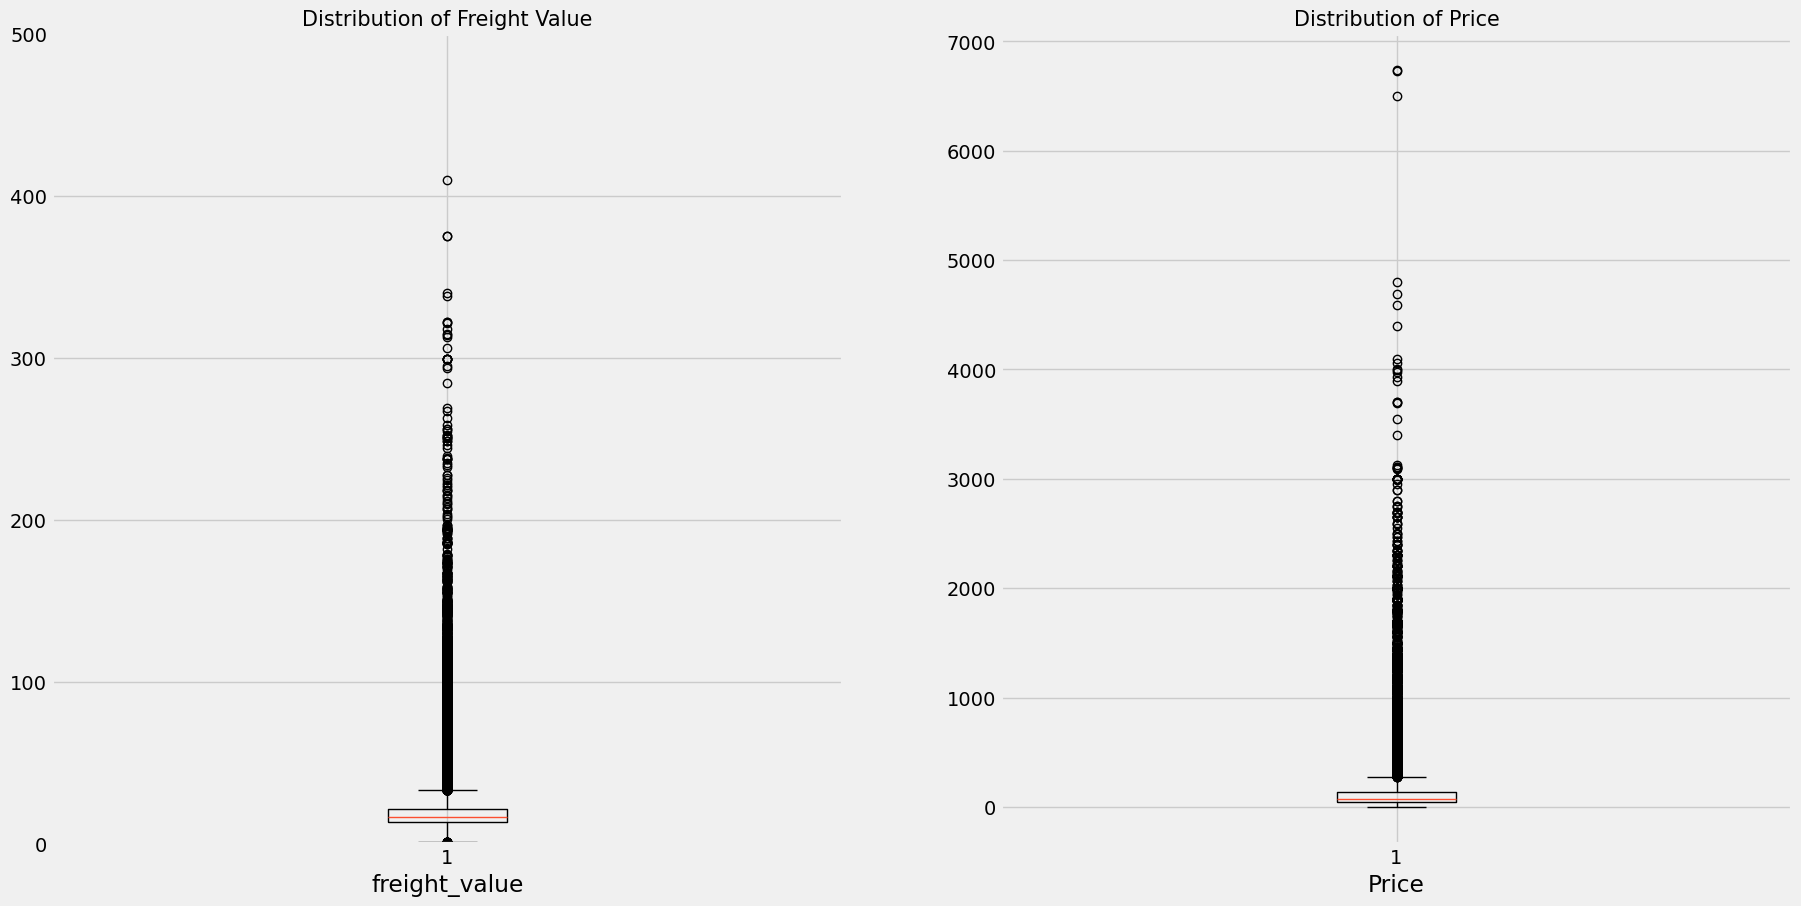

In [27]:
fig, ax = plt.subplots(1,2,figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.title('Distribution of numeric columns', fontsize=20)
#fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
#plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0].boxplot(x = order_items_df['freight_value']) # creates boxplot for number of views
ax[0].set_xlabel(xlabel="freight_value") # sets the label for the ticks on the x-axis
ax[0].set_ylim(0,500) # limits the y-axis values from 0 to 2000000 
ax[0].set_title("Distribution of Freight Value", fontsize = 15); # sets title for subplot

ax[1].boxplot(x = order_items_df['price'])
ax[1].set_xlabel("Price")
#ax[0][1].set_ylim(0,50000)
ax[1].set_title("Distribution of Price", fontsize = 15);

In [28]:
op = order_payments_ref_df
op.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
corr_columns = ['payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
corr_mtrx1 = op[corr_columns].corr()
corr_mtrx1

,payment_sequential,payment_installments,payment_value
payment_sequential,1.00,-0.09,-0.07
payment_installments,-0.09,1.00,0.33
payment_value,-0.07,0.33,1.00


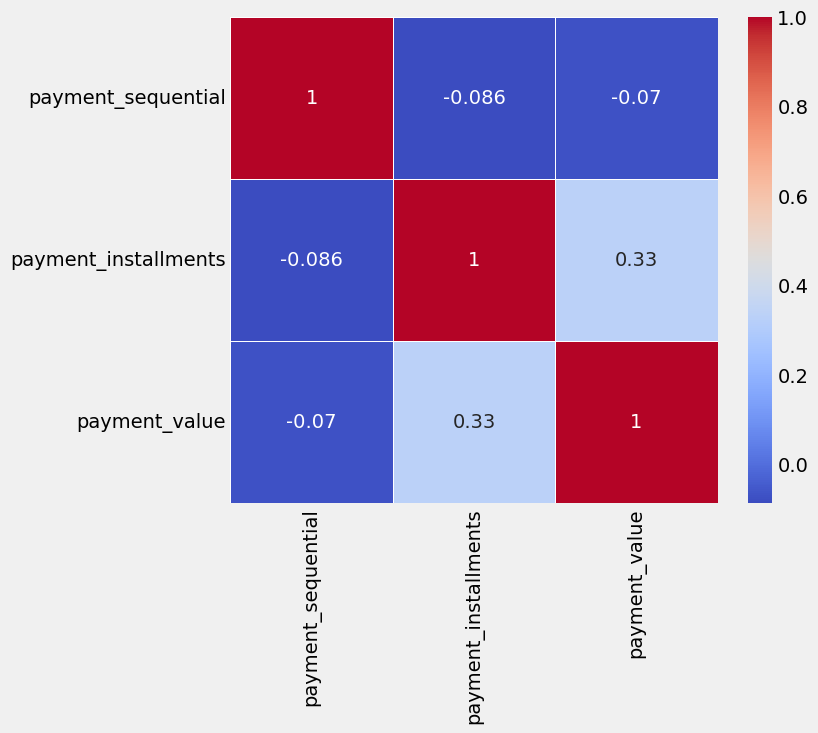

In [30]:
plt.figure(figsize = (7,6))
ax = sns.heatmap(corr_mtrx1, linewidths=.5, annot=True, cmap='coolwarm')

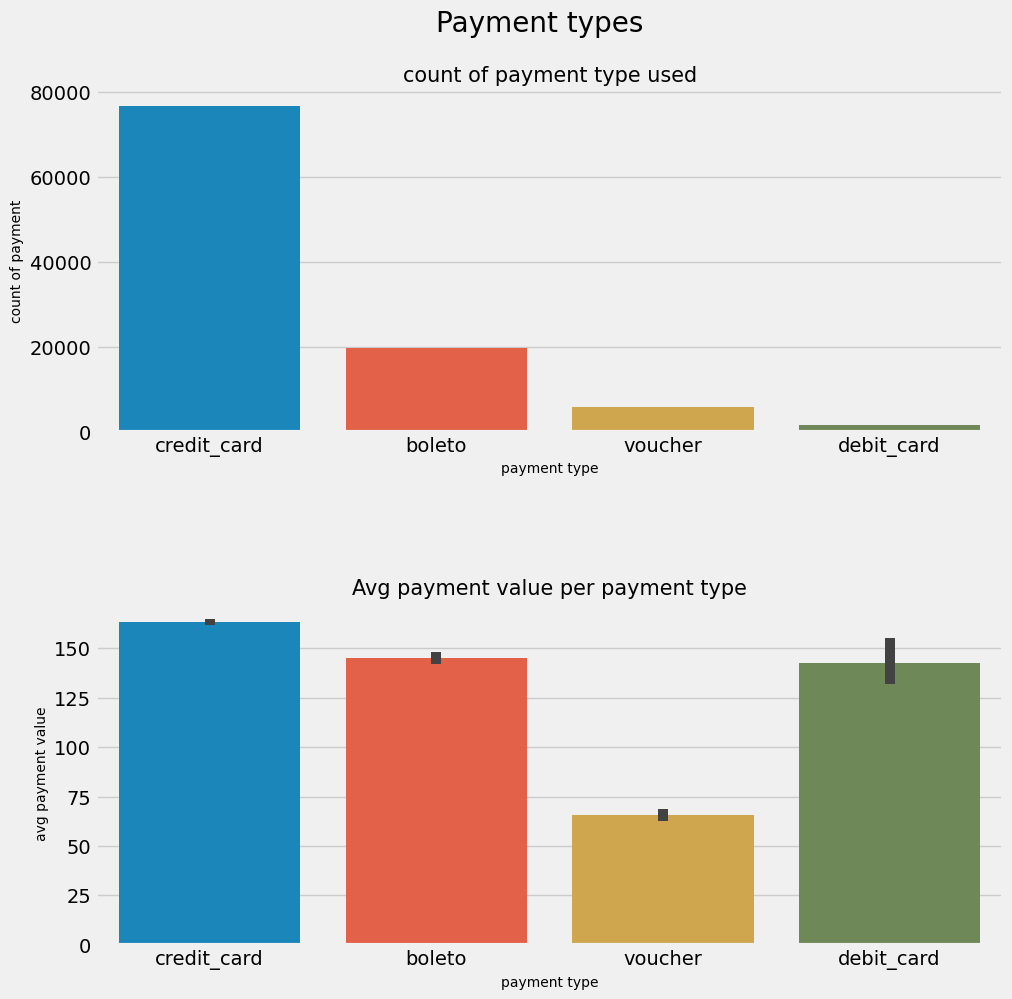

In [31]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
plt.suptitle('Payment types', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=op['payment_type'], ax=ax[0])
f1.set_ylabel('count of payment', fontsize = 10)
f1.set_xlabel('payment type', fontsize = 10)
f1.set_xticks([0,1,2,3])
f1.set_xticklabels(labels=['credit_card', 'boleto', 'voucher', 'debit_card'])
f1.set_title('count of payment type used', fontsize = 15);

f2= sns.barplot(x=op['payment_type'], y=op['payment_value'], ax=ax[1])
f2.tick_params(axis='x')
f2.set_xlabel('payment type', fontsize = 10)
f2.set_ylabel('avg payment value', fontsize = 10)
f2.set_title('Avg payment value per payment type', fontsize = 15);

In [32]:
sr = seller_review_df
sr.head()

,order_id,order_status,order_purchase_timestamp,review_id,review_score,review_creation_date,product_id,seller_id,price,freight_value,order_year,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,a54f0611adc9ed256b57ede6b6eb5114,4.00,2017-10-11,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,8d5266042046a06655c8db133d120ba5,4.00,2018-08-08,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,e73b67b67587f7644d5bd1a52deb1b01,5.00,2018-08-18,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,359d03e676b3c069f62cadba8dd3f6e8,5.00,2017-12-03,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,e50934924e227544ba8246aeb3770dd4,5.00,2018-02-17,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,2018,2


In [33]:
sr.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp', 'review_id',
       'review_score', 'review_creation_date', 'product_id', 'seller_id',
       'price', 'freight_value', 'order_year', 'order_month'],
      dtype='object')

In [34]:
corr_columns = ['order_status', 'review_score', 'price', 'freight_value']
corr_mtrx3 = sr[corr_columns].corr()
corr_mtrx3

,review_score,price,freight_value
review_score,1.00,-0.00,-0.04
price,-0.00,1.00,0.41
freight_value,-0.04,0.41,1.00


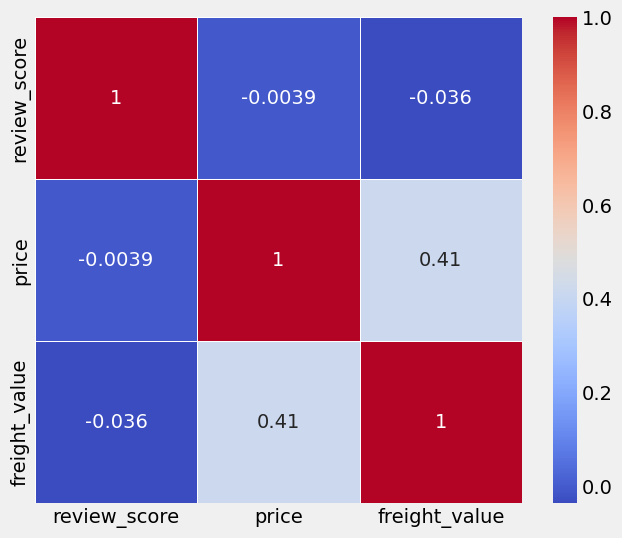

In [35]:
plt.figure(figsize = (7,6))
ax = sns.heatmap(corr_mtrx3, linewidths=.5, annot=True, cmap='coolwarm')

In [36]:
od = orders_delivered_df
od.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_item_id,...,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days,order_delivered_carrier_date_m,order_delivered_customer_date_m,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,1,...,2017,10,3,5,6,11,642000000000,2017-10-04 19:55:00,2017-10-10 21:25:13,appliances
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,2,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,1.00,1,...,2017,9,1,8,0,3,1007000000000,2017-09-04 21:22:15,2017-09-05 19:20:20,baby
4,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2.00,1,...,2017,8,2,7,0,6,5745000000000,2017-08-17 15:28:33,2017-08-18 14:44:43,appliances


In [37]:
od['approval_days'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110197 entries, 0 to 110196
Series name: approval_days
Non-Null Count   Dtype
--------------   -----
110197 non-null  int64
dtypes: int64(1)
memory usage: 861.0 KB


In [38]:
od.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_delivery_customer_day_difference', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix', 'seller_lat',
       'seller_lon', 'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_lat', 'customer_lon',
       'customer_city', 'customer_state', 'distance', 'order_year',
       'order_month', 'actual_processing_days', 'estimated_processing_days',
       'actual_shipping_days', 'estimated_shipping_days', 'approval_days',
       'order_delivered_carrier_date_m', 'order_delivered_customer_date_m',
     

In [39]:
corr_columns = ['order_status', 'order_delivery_customer_day_difference', 'actual_processing_days', 'estimated_processing_days', 'actual_shipping_days', 'estimated_shipping_days', 'product_category', 'price', 'freight_value', 'distance']
corr_mtrx2 = od[corr_columns].corr()
corr_mtrx2

,order_delivery_customer_day_difference,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,price,freight_value,distance
order_delivery_customer_day_difference,1.00,0.41,0.19,0.92,0.34,0.06,0.21,0.39
actual_processing_days,0.41,1.00,0.40,0.03,0.06,0.06,0.09,0.02
estimated_processing_days,0.19,0.40,1.00,0.04,0.03,0.05,0.08,0.03
actual_shipping_days,0.92,0.03,0.04,1.00,0.34,0.04,0.20,0.42
estimated_shipping_days,0.34,0.06,0.03,0.34,1.00,0.06,0.27,0.54
price,0.06,0.06,0.05,0.04,0.06,1.00,0.41,0.09
freight_value,0.21,0.09,0.08,0.20,0.27,0.41,1.00,0.39
distance,0.39,0.02,0.03,0.42,0.54,0.09,0.39,1.00


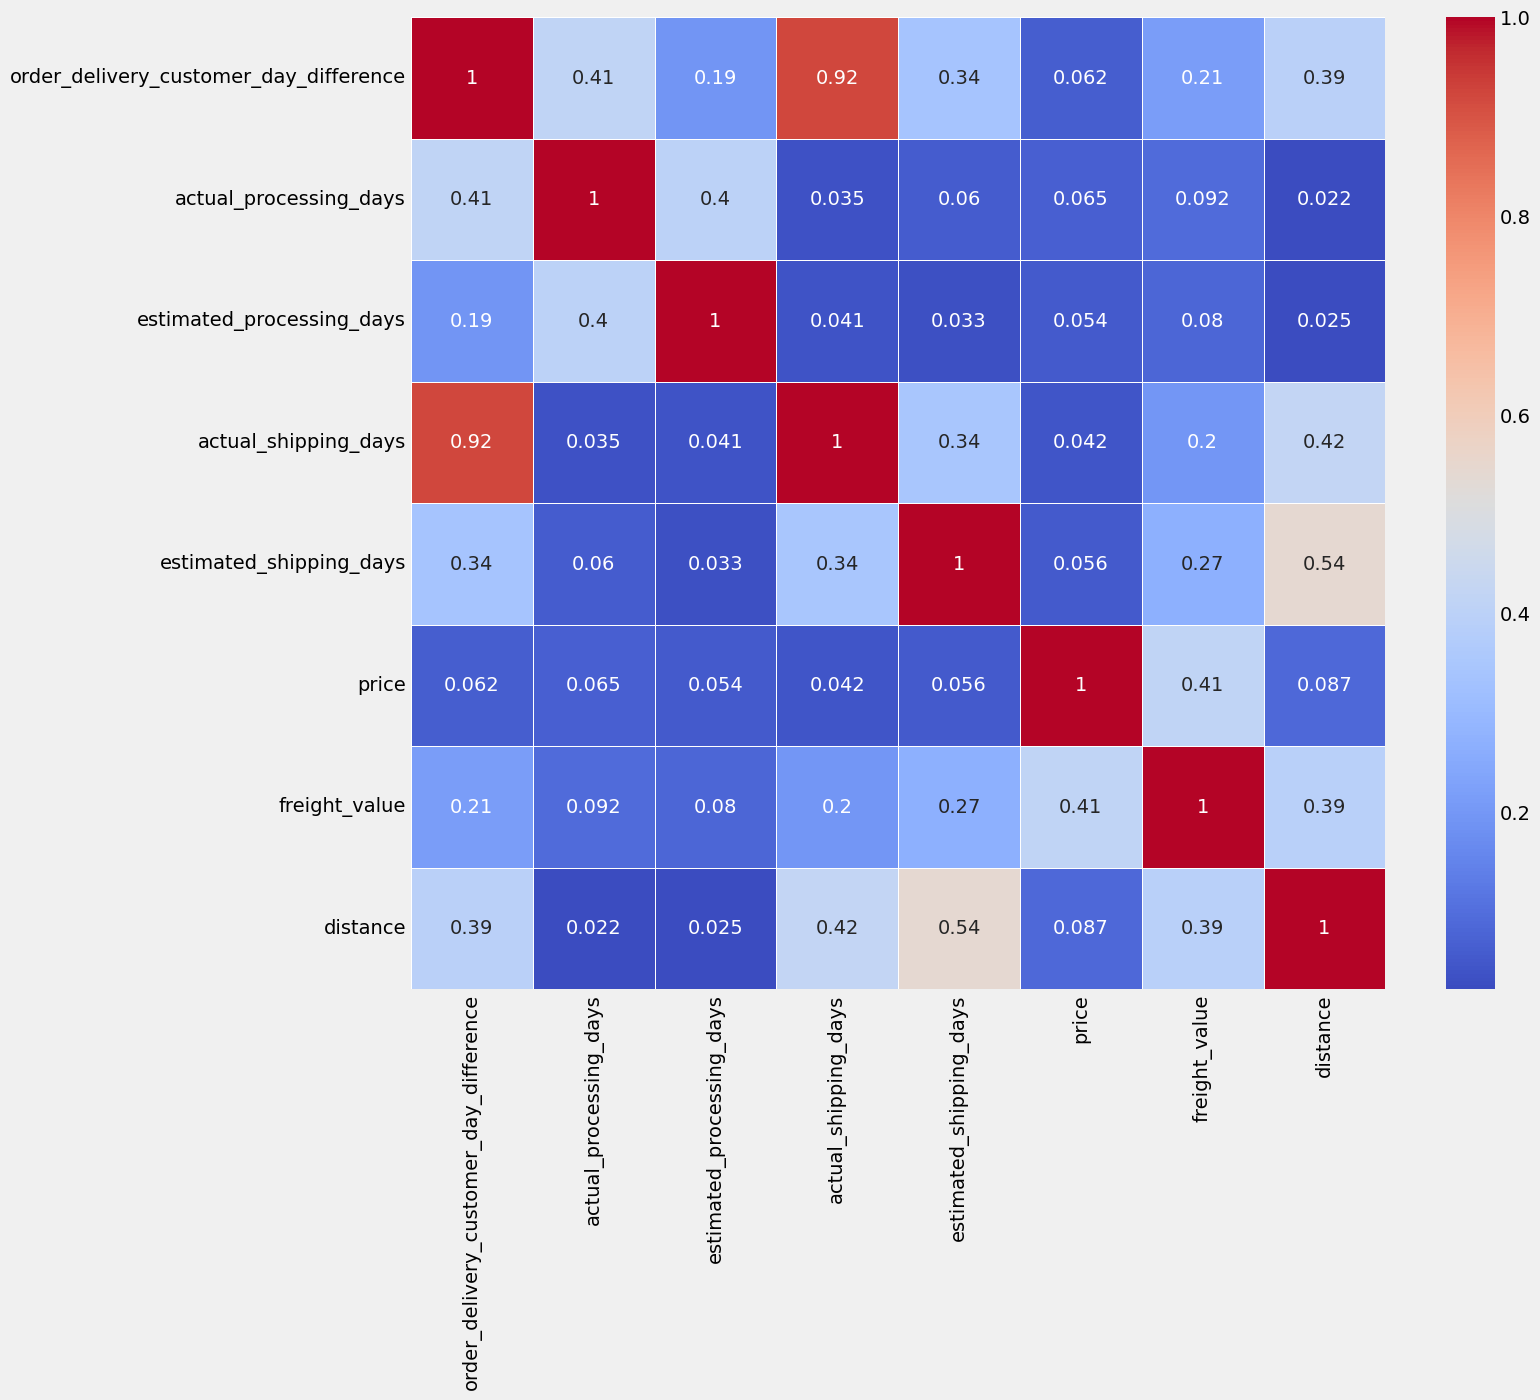

In [40]:
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx2, linewidths=.5, annot=True, cmap='coolwarm')

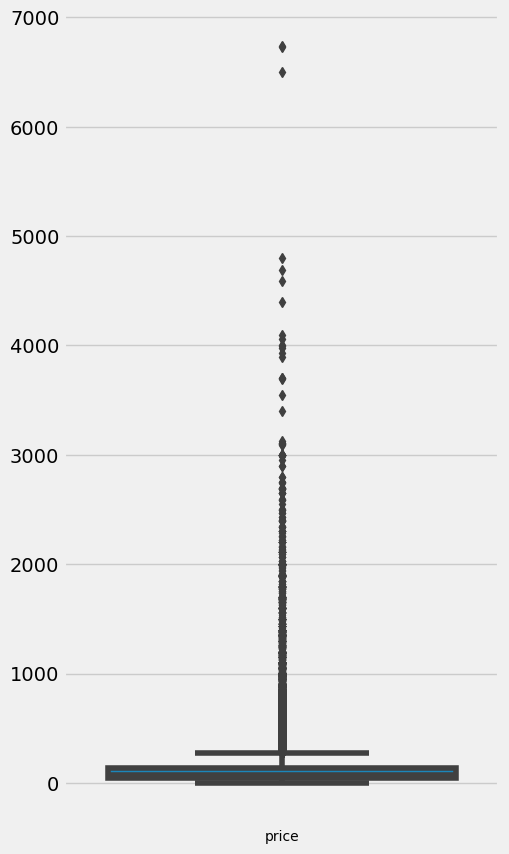

In [41]:
plt.figure(figsize=(5,10))
f1 = sns.boxplot(y=od['price'])
f1.set(ylabel=None)
f1.set_xlabel('price', fontsize = 10);

In [42]:
od['price'].describe()

count   110,197.00
mean        119.98
std         182.30
min           0.85
25%          39.90
50%          74.90
75%         134.17
max       6,735.00
Name: price, dtype: float64

In [54]:
seventeen = od[od['order_year'] == 2017]
seventeen.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_item_id,...,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days,order_delivered_carrier_date_m,order_delivered_customer_date_m,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,1,...,2017,10,3,5,6,11,642000000000,2017-10-04 19:55:00,2017-10-10 21:25:13,appliances
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,1.00,1,...,2017,9,1,8,0,3,1007000000000,2017-09-04 21:22:15,2017-09-05 19:20:20,baby
4,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2.00,1,...,2017,8,2,7,0,6,5745000000000,2017-08-17 15:28:33,2017-08-18 14:44:43,appliances
5,9e9f909cd250058d062bb2b0b0161c92,e15a69da6ddca9fc7bf178c28f529529,delivered,2017-07-02 15:37:04,2017-07-04 04:30:13,2017-07-04 10:09:49,2017-07-13 17:36:01,2017-08-01,11.00,1,...,2017,7,2,8,9,21,132789000000000,2017-07-04 10:09:49,2017-07-13 17:36:01,health_and_beauty
8,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5.00,1,...,2017,8,2,7,3,6,1108000000000,2017-08-04 17:35:43,2017-08-07 18:30:01,appliances


In [71]:
bbt_s = seventeen[seventeen['product_category'] == 'bed_bath_table']
bbt_s.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_item_id,...,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days,order_delivered_carrier_date_m,order_delivered_customer_date_m,product_category
31,ceabb3e5878fd35ef9451cb2aeda20b1,1671f344bd401d0cc0ba2869cf2ae973,delivered,2017-05-30 17:29:14,2017-05-31 17:35:10,2017-06-01 08:38:15,2017-06-13 14:38:16,2017-06-20,13.00,1,...,2017,5,2,8,12,13,86756000000000,2017-06-01 08:38:15,2017-06-13 14:38:16,bed_bath_table
43,ae4d24eaeb2f2184852be775af5cf9ca,922d9875c96d766b5427e8cbb9f07eb2,delivered,2017-02-28 23:47:08,2017-03-03 02:15:37,2017-03-06 07:43:38,2017-03-13 07:14:04,2017-03-20,12.00,1,...,2017,2,6,9,6,10,181709000000000,2017-03-06 07:43:38,2017-03-13 07:14:04,bed_bath_table
44,0afbc110b84719faaef4887a5cff5a2c,dba001f78ebcbf63aec0095cc03ad969,delivered,2017-01-31 22:31:13,2017-01-31 22:45:17,2017-02-01 15:59:53,2017-02-15 13:55:49,2017-03-07,14.00,1,...,2017,1,1,5,13,30,844000000000,2017-02-01 15:59:53,2017-02-15 13:55:49,bed_bath_table
62,25d0455ca29c6f58e491a90065954af0,2835fc229807133f646ae4245e5e6150,delivered,2017-12-25 23:23:06,2017-12-27 04:07:51,2017-12-27 21:59:18,2018-01-17 18:43:22,2018-01-15,22.00,1,...,2017,12,2,9,20,11,103485000000000,2017-12-27 21:59:18,2018-01-17 18:43:22,bed_bath_table
118,5f40a2492ceef8196dae8b163a97530e,d74802c9d51f1b7325b03f595ebe85e6,delivered,2017-06-13 21:11:56,2017-06-13 21:22:42,2017-06-19 08:10:14,2017-06-23 12:55:06,2017-07-10,9.00,1,...,2017,6,6,13,4,14,646000000000,2017-06-19 08:10:14,2017-06-23 12:55:06,bed_bath_table


In [77]:
bbt_s['product_id'].nunique()

3276

In [62]:
eighteen = od[od['order_year'] == 2018]
eighteen.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_item_id,...,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days,order_delivered_carrier_date_m,order_delivered_customer_date_m,product_category
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,2,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table
6,ded23d37cdcc25b37b4473b7be770cb2,f96144f946e8e590fabf60a3a1e3342e,delivered,2018-07-26 18:25:40,2018-07-27 02:10:26,2018-08-02 14:13:00,2018-08-07 12:12:23,2018-08-20,11.00,1,...,2018,7,7,7,4,17,27886000000000,2018-08-02 14:13:00,2018-08-07 12:12:23,bed_bath_table
7,6a6b5f5c1957d008772dc54c84a0980f,09dd5b8cd013d6fe41dc343609a44cc2,delivered,2018-04-05 12:39:41,2018-04-05 12:55:35,2018-04-06 23:28:50,2018-04-09 13:52:49,2018-04-20,4.00,1,...,2018,4,2,7,2,8,954000000000,2018-04-06 23:28:50,2018-04-09 13:52:49,electronics
11,e7d970bfdd1725c64b0a4188b2c35e87,3f13ac929b046c754deaf694f350faef,delivered,2018-02-08 16:17:02,2018-02-08 17:06:01,2018-02-09 18:47:08,2018-02-21 20:29:12,2018-03-02,13.00,1,...,2018,2,2,7,12,15,2939000000000,2018-02-09 18:47:08,2018-02-21 20:29:12,book


In [67]:
bbt_e = eighteen[eighteen['product_category'] == 'bed_bath_table']
bbt_e.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_item_id,...,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days,order_delivered_carrier_date_m,order_delivered_customer_date_m,product_category
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,2,...,2018,3,2,7,1,6,2535000000000,2018-03-23 18:03:03,2018-03-25 17:22:41,bed_bath_table
6,ded23d37cdcc25b37b4473b7be770cb2,f96144f946e8e590fabf60a3a1e3342e,delivered,2018-07-26 18:25:40,2018-07-27 02:10:26,2018-08-02 14:13:00,2018-08-07 12:12:23,2018-08-20,11.00,1,...,2018,7,7,7,4,17,27886000000000,2018-08-02 14:13:00,2018-08-07 12:12:23,bed_bath_table
33,e0145369394f83a5210ad16511c6cf33,5c7ad9cbcfbe41d1dd622c64bb0812bd,delivered,2018-07-01 14:28:04,2018-07-02 12:15:15,2018-07-03 08:05:00,2018-07-07 18:26:29,2018-08-02,6.00,1,...,2018,7,2,8,4,23,78431000000000,2018-07-03 08:05:00,2018-07-07 18:26:29,bed_bath_table
45,e81515594e8f430f4a7ee18f26777091,5c249c721eea202f6130a24ede66ebe7,delivered,2018-05-24 16:22:20,2018-05-24 18:23:15,2018-05-25 15:35:00,2018-06-09 10:58:50,2018-06-18,15.00,1,...,2018,5,1,5,14,20,7255000000000,2018-05-25 15:35:00,2018-06-09 10:58:50,bed_bath_table


In [76]:
bbt_e['product_id'].nunique()

3352

In [95]:
eda = od.groupby(['product_category', 'order_year', 'product_id'])['product_id'].count().reset_index(name='count_pid')
eda.head()

,product_category,order_year,product_id,count_pid
0,appliances,2016,0ab80f38a21093b448518f68efe82c24,1
1,appliances,2016,2504bf725d7aa06820b73b85c5ca6653,1
2,appliances,2016,29bedbfbe73ea473396306b4f0c010ec,2
3,appliances,2016,7e7e1af4ab49963c6e1245b2dbd8f492,1
4,appliances,2016,d26580768894ea0cdc9f19dc672956c2,1


In [98]:
eda[eda['product_category'] == 'bed_bath_table'].duplicated(subset=['product_category', 'product_id'], keep=False).value_counts()

False    4738
True     1949
dtype: int64